# Классификация данных электронной коммерции

Исследуемый набор текстовых данных электронной коммерции, размеченный исходя из принадлежности к одной из следующих 4 категорий:

•	Электроника

•	Домашнее хозяйство

•	Книги

•	Одежда и аксессуары


Эти категории охватывают почти 80% товаров любого веб-сайта электронной коммерции.

https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
import warnings
warnings.simplefilter('ignore')
!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy as spacy
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, Perceptron, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomTreesEmbedding
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer as TfidfVec
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
!pip install pymorphy2
import pymorphy2
!pip install optuna
from lightgbm import LGBMClassifier
import optuna
from optuna.visualization import *
from scipy.sparse import coo_matrix, hstack, csr_matrix, lil_matrix
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-10-18 03:30:20.756856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 03:30:21.892748:

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=a6ad4847859f57675ee970b7b9d0de339a4778b1ac3ebc0848fc21c32469a749
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


In [3]:
!pip install deepdish # Библиотека для сохранения/заг
import deepdish as dd

In [4]:
def valcounter(ser): # функция оценки распределения по классам
  vc=pd.concat([ser.value_counts(), ser.value_counts(normalize=True).round(3)*100],  axis=1 )
  vc.columns=(['Num.', '%'])
  return vc

Загрузим данные и рассмотрим их.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/ecommerceDataset.csv', header=None)
df.columns=['Topic', 'Description']
df.head()

,Topic,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [7]:
valcounter(df.Topic)

,Num.,%
Household,19313,38.3
Books,11820,23.4
Electronics,10621,21.1
Clothing & Accessories,8671,17.2


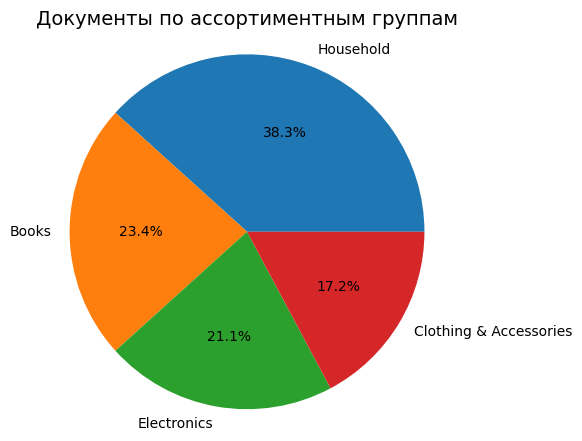

In [8]:
plt.pie(valcounter(df.Topic).iloc[:,1], labels=valcounter(df.Topic).index, autopct='%.1f%%', radius=1.2)
# sns.set(title='Documents by topics').title=["Documents by topics"]
plt.title(label="Документы по ассортиментным группам", fontdict={"fontsize":14}, pad=16)
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Topic        50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


Классы вполне сбалансированы, пропуск всего в одной записи, мы её удаляем её и проверяем данные на дупликаты, и в случае наличия,  характер их распределения по темам

In [10]:
df.dropna(inplace=True)

In [11]:
100*(df[df.duplicated()].count()/df.shape[0]).round(4)

Topic          44.86
Description    44.86
dtype: float64

Практически каждая вторая запись в датасете представляет собой дубликат.

In [12]:
(df[df.duplicated()].groupby("Topic").count().apply(lambda x: x/x.sum())*100).round(2)

,Description
Topic,
Books,24.60
Clothing & Accessories,13.24
Electronics,23.49
Household,38.67


Частота распределения дубликатов по темам близка к частоте распределения по темам полного датасета. Проверим распределение на дедуплицированном датасете.

In [13]:
dfwodups=df.drop_duplicates()
valcounter(dfwodups.Topic)

,Num.,%
Household,10564,38.0
Books,6256,22.5
Clothing & Accessories,5674,20.4
Electronics,5308,19.1


In [14]:
dfwodups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27802 entries, 0 to 50410
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Topic        27802 non-null  object
 1   Description  27802 non-null  object
dtypes: object(2)
memory usage: 651.6+ KB


In [15]:
df.Description.sort_values()

1895     # The Silky Beans 1.5 KG Premium Bean Bag Fill...
1912     # The Silky Beans 2 KG Premium A-Grade for Bea...
2442     # The Silky Beans 2 KG Premium Bean Bag Filler...
1932     # The Silky Beans 2 KG Premium Bean Bag Filler...
2433     # The Silky Beans 2 KG Premium Bean Bag Filler...
                               ...                        
22153    एन टी  ए-, यू. जी. सी. (नेट /सेट/जे आर एफ) साम...
24286    घटना-समय पद्धति (ETP - Event Time Prediction) ...
22135    यू जी सी – नेट जूनियर रिसर्च फैलोशिप एवं सहायक...
22158    यू जी सी – नेट जूनियर रिसर्च फैलोशिप एवं सहायक...
22117    જાહેર વહીવટ SPECIALLY RECOMMENDED FOR BIN-SACH...
Name: Description, Length: 50424, dtype: object

Мы видим, что после удаления дубликатов, соотношение классов практически не изменилось, и разбалансировка не произошла. Поэтому в данном ноутбуке мы будем работать с дедуплицированным набором даных. Как мы видим, в тексте присутствует символы не относящиеся к  ASCII, их необходимо будет обработать

In [16]:
df=dfwodups
df.reset_index(drop=True)

,Topic,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
27797,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
27798,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
27799,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
27800,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


Определим количество символов в строке каждого описания до и после удаления стоп-слов.

In [17]:
df.Description.apply(len).head(5) # Исходное описание датасета

0    1338
1     346
2    1316
3    1091
4     989
Name: Description, dtype: int64

In [18]:
stop = stopwords.words(['english'])

In [20]:
# очиста датафрейма от стоп-слов
def string_splitter(ser):
  return ser.str.lower().str.split().apply(lambda x:
                                           [word for
                                            word in
                                            x if
                                            word
                                            not in stop]).apply(lambda x: ' '.join(x))

df['Desc_wows']=string_splitter(df.Description)

In [21]:
df['Desc_wows']

0        paper plane design framed wall hanging motivat...
1        saf 'floral' framed painting (wood, 30 inch x ...
2        saf 'uv textured modern art print framed' pain...
3        saf flower print framed painting (synthetic, 1...
4        incredible gifts india wooden happy birthday u...
                               ...                        
50402    micromax bharat 5 plus zero impact visual disp...
50403    microsoft lumia 550 8gb 4g black microsoft lum...
50407    microsoft lumia 535 (black, 8gb) colour:black ...
50408    karbonn titanium wind w4 (white) karbonn titan...
50410    nokia lumia 530 (dual sim, grey) colour:grey p...
Name: Desc_wows, Length: 27802, dtype: object


Проведём очистку от не-ASCII символов

In [23]:
df['Desc_wows']=df['Desc_wows'].sort_values().str.encode('ascii', 'ignore').str.decode('ascii').str.replace(r'\s+', ' ', regex=True)
df['Desc_wows']

0        paper plane design framed wall hanging motivat...
1        saf 'floral' framed painting (wood, 30 inch x ...
2        saf 'uv textured modern art print framed' pain...
3        saf flower print framed painting (synthetic, 1...
4        incredible gifts india wooden happy birthday u...
                               ...                        
50402    micromax bharat 5 plus zero impact visual disp...
50403    microsoft lumia 550 8gb 4g black microsoft lum...
50407    microsoft lumia 535 (black, 8gb) colour:black ...
50408    karbonn titanium wind w4 (white) karbonn titan...
50410    nokia lumia 530 (dual sim, grey) colour:grey p...
Name: Desc_wows, Length: 27802, dtype: object

Разобъём слова в записях очищенного датасета на символы и посмотрим насколько часто они встречаются в документах корпуса (мешок символов)

In [24]:
#Определяем количество каждого из символов в документах,
charset=df['Desc_wows'].apply(Counter).apply(pd.Series)
charset=charset.sort_index(axis=1,
                           ascending=False)

In [25]:
display(charset.head(), charset.columns)

,,~,},|,{,z,y,x,w,v,...,),(,',&,%,$,#,"""",!,
0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,6.0,13.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,137.0
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,4.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
2,NaN,NaN,NaN,1.0,NaN,2.0,11.0,5.0,9.0,10.0,...,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,130.0
3,NaN,NaN,NaN,1.0,NaN,1.0,9.0,4.0,7.0,8.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
4,NaN,NaN,NaN,NaN,NaN,7.0,5.0,3.0,9.0,8.0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,100.0


Index(['', '~', '}', '|', '{', 'z', 'y', 'x', 'w', 'v', 'u', 't', 's', 'r',
       'q', 'p', 'o', 'n', 'm', 'l', 'k', 'j', 'i', 'h', 'g', 'f', 'e', 'd',
       'c', 'b', 'a', '`', '_', '^', ']', '\', '[', '@', '?', '>', '=', '<',
       ';', ':', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0', '/', '.',
       '-', ',', '+', '*', ')', '(', ''', '&', '%', '$', '#', '"', '!', ' '],
      dtype='object')

Объединяем полученные признаки с признаком текстового описания и посмотрим как распределены частоты встречаемости символов для каждой ассортименной категории


In [26]:
dfchar=pd.concat([df, charset], axis=1) # Объединяем мешок символов с основным датафреймом
dfchar.reset_index(drop=True, inplace=True)
dfchar.drop('Description', axis=1, inplace=True)
dfchar.head()

,Topic,Desc_wows,,~,},|,{,z,y,x,...,),(,',&,%,$,#,"""",!,
0,Household,paper plane design framed wall hanging motivat...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,2.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,137.0
1,Household,"saf 'floral' framed painting (wood, 30 inch x ...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
2,Household,saf 'uv textured modern art print framed' pain...,NaN,NaN,NaN,1.0,NaN,2.0,11.0,5.0,...,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,130.0
3,Household,"saf flower print framed painting (synthetic, 1...",NaN,NaN,NaN,1.0,NaN,1.0,9.0,4.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0
4,Household,incredible gifts india wooden happy birthday u...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,3.0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,100.0


Убираем количество признак количества пробелов

In [27]:
dfchar.drop(dfchar.columns[[2, -1]], axis=1, inplace=True)

Мы получили список из 68 ASCII-символов, но некоторые из них встречаются очень редко и не несут особой информации. Также, скорее всего будут и символы которые встречаются практически во всех документах и не несущих поэтому никакой полезной информации. Рассмотрим как распределены наши символы (сортировать будем по встречаемости класса Домоводство


In [28]:
def nancounter(fr, sorting='Values'): # сумматор пропусков
  # plt.figure(figsize=[14, 4])
  if sorting=="Values":
    return fr.isna().sum().sort_values(ascending=False)
  else:
    return fr.isna().sum().sort_index(ascending=False)



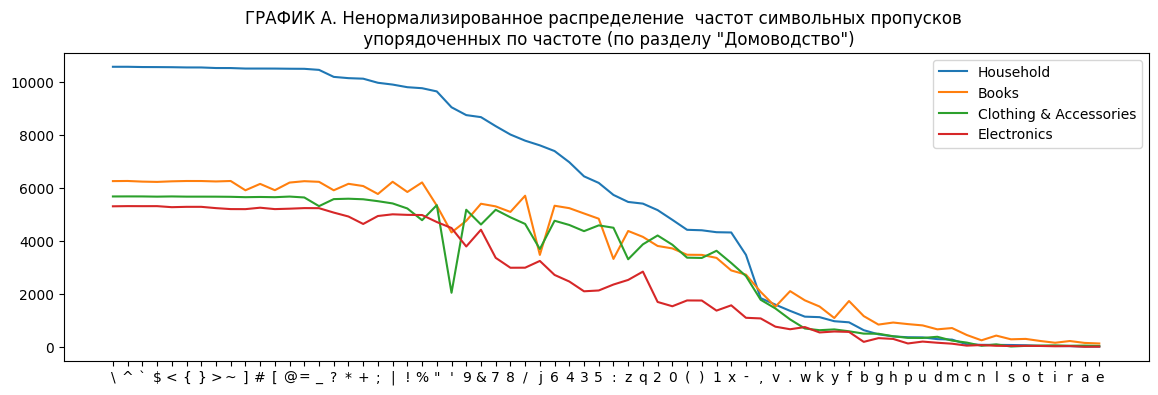

In [29]:
plt.figure(figsize=[14, 4])
for i in dfchar.Topic.unique():
  sns.lineplot(dfchar[dfchar.Topic==i].iloc[:,2:].
               isna().sum().sort_values(ascending=False),
               label=i).set(title='ГРАФИК А. Ненормализированное распределение  частот символьных пропусков \n упорядоченных по частоте (по разделу "Домоводство")')
plt.labels=['Household', 'Books', 'Clothing & Accessories', 'Electronics']
plt.show()

Если говорить об абсолютных количествах пропусков, мы видим что пропусков больше всего в разделе Домоводство, а для разделов Книги и Одежда и Аксессуары, распределения очень похожи, минимальное количество пропусков мы видим в разделе Электороника. Но что нам скажут относительные частоты пропусков?

In [30]:
char_by_topics_norm=(dfchar.iloc[:,2:].groupby(dfchar.Topic).
                     sum()/dfchar.iloc[:,2:].
                     shape[0])
char_by_topics_norm


,~,},|,{,z,y,x,w,v,u,...,*,),(,',&,%,$,#,"""",!
Topic,,,,,,,,,,,,,,,,,,,,,
Books,0.000072,0.000108,0.002050,0.000072,0.176174,2.269513,0.428566,1.634523,1.702539,3.903208,...,0.055464,0.248615,0.247105,0.246169,0.050284,0.002698,0.003021,0.005683,0.281023,0.027948
Clothing & Accessories,0.000971,0.000324,0.026473,0.000324,0.190706,1.185850,0.202324,0.949752,0.572836,1.666247,...,0.010934,0.127473,0.124487,0.175023,0.060283,0.043486,0.000324,0.007769,0.056255,0.029386
Electronics,0.006474,0.010827,0.022768,0.010863,0.247680,1.600496,0.575031,1.246565,1.322926,3.281994,...,0.064492,0.283253,0.276059,0.055140,0.062226,0.018488,0.000216,0.022301,0.066506,0.020502
Household,0.003381,0.012733,0.054528,0.012697,0.397525,2.635818,0.649270,2.192037,1.753183,5.128228,...,0.064492,0.363751,0.351521,0.098446,0.122905,0.039997,0.000540,0.023739,0.087260,0.048917


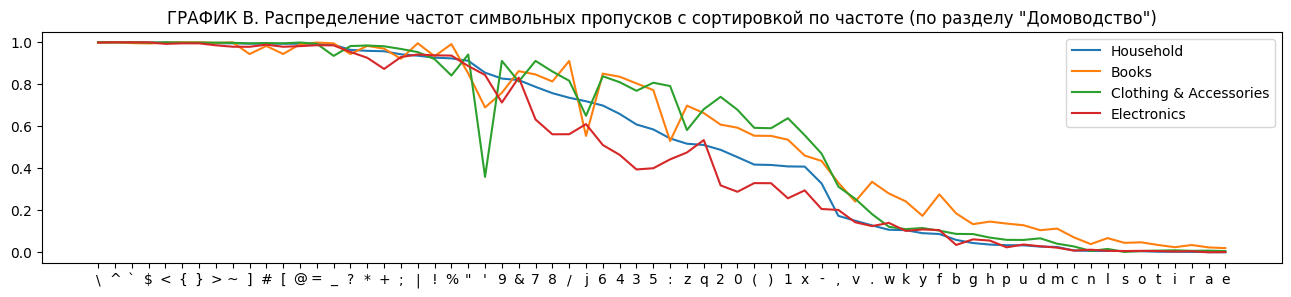

In [31]:
plt.figure(figsize=[16, 3])
for i in dfchar.Topic.unique():
  nansbytopic=nancounter(dfchar[dfchar.Topic==i].iloc[:, 2:])
  sns.lineplot(nansbytopic/(dfchar[dfchar.Topic==i].shape[0]),
               label=i).set(title='ГРАФИК B. Распределение частот символьных пропусков с сортировкой по частоте (по разделу "Домоводство")')
  # sns.lineplot(nancounter(i).iloc[:-3], label=i)
plt.show()

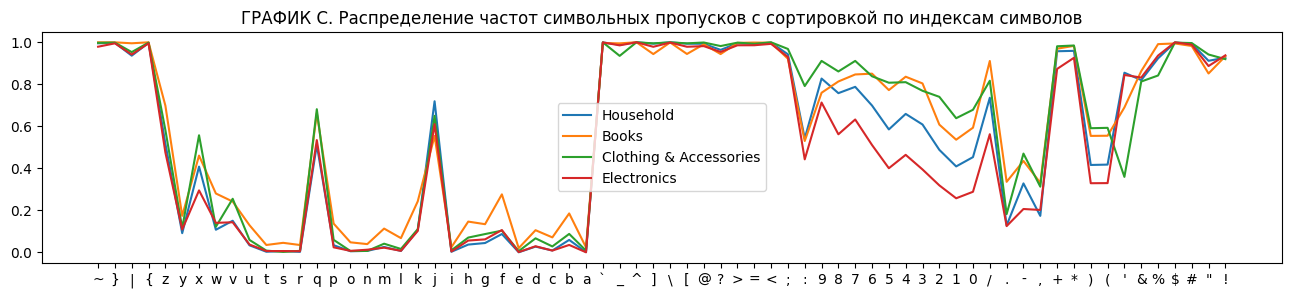

In [32]:
plt.figure(figsize=[16, 3])
for i in dfchar.Topic.unique():
  nansbytopic=nancounter(dfchar[dfchar.Topic==i].iloc[:, 2:], 'index')
  sns.lineplot(nansbytopic/(dfchar[dfchar.Topic==i].shape[0]), label=i).set(title='ГРАФИК С. Распределение частот символьных пропусков с сортировкой по индексам символов')
  # sns.lineplot(nancounter(i).iloc[:-3], label=i)

plt.show()

На графике различимы 3 основные области, в результате анализа которых мы приходим к интересным выводам:

  A) Низковариативная область редкой встречаемости символов (спецсимволы и арифметические действия, а также скобки кроме круглых). Интересно что в эту группу попадает знак сложения, который было бы ожидаемо видеть среди часто встречающихся символов.

  Б) Область высокой вариативности распределения отсутствий символов. Эту область образуют буквы (x, q и j, для них фиксируются аномально высокие, нехарактерные для букв частоты пропусков), знаки препинания, а также все цифры. Интересно что очень контрастна вариативность распределения цифр, при сохранении трендов изменения частот встречаемости. Чаще всего цифры ожидаемо встречаются в документах с описаниями электроники и реже всего в описаниях одежды и аксессуаров. Также очень интересно аномально низком количества пропусков симовла "одинарные кавычки" для раздела Одежда и аксессуары, возможно она отражает имена собственные в притяжательном падеже.

  В) Область стационарности (высокая встречаемость символов) представленная только буквами, здесь наблюдается малая вариативность частот по буквам. Вариативность по классам тоже незкая, за исключением более высокого количества пропущеннных букв для раздела Книги.


Общие тенденции изменения частот символов по корпусу приведены на графике ниже

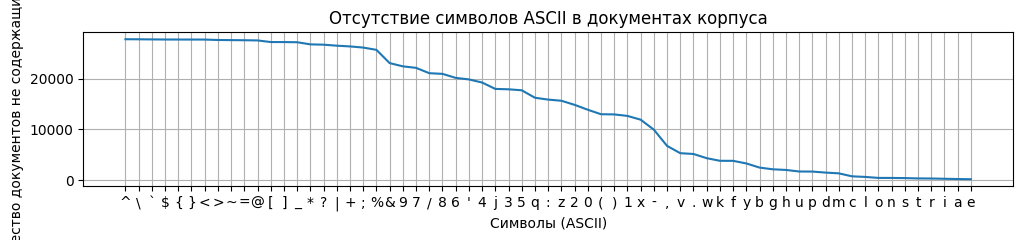

In [33]:
plt.figure(figsize=[12, 2])
sns.lineplot(nancounter(dfchar.iloc[:, 2:-3])).set(title='Отсутствие символов ASCII в документах корпуса')
plt.xlabel('Символы (ASCII)')
plt.ylabel('Количество документов не содержащих символ')
plt.grid()
plt.show()

Как мы видим на графике выделяются четыре региона встречаемости символов:

1) Регион цифр спецсимволов, знаков припинания (кроме точки, запятой и тире) и символов математических действий. В него попали и четыре буквы: j, q, z и x.

2) Регион резкого роста популярности символов (точка, запятая и тире), а также буква V

3) и 4) Регионы линейного роста популярности символов, после буквы С рост встречаемость практически останавливается, дальнейшие буквы встречаются в подавляющем количестве документов корпуса.


Убираем из списка признаков все признаки находящиеся на графике B до знака "!", а также все признаки на графике начиная с буквы "n"

In [34]:
charslist=nancounter(dfchar.query('Topic=="Household"').iloc[:, 2:], ).index.to_list() # список символов для очистки
dfchar=pd.concat([dfchar.iloc[:, :2], dfchar[charslist[charslist.index('!')+1: charslist.index('n')+1]]], axis=1)

Для проверки всё ли мы правильно удалили, повторно строим график пропусков

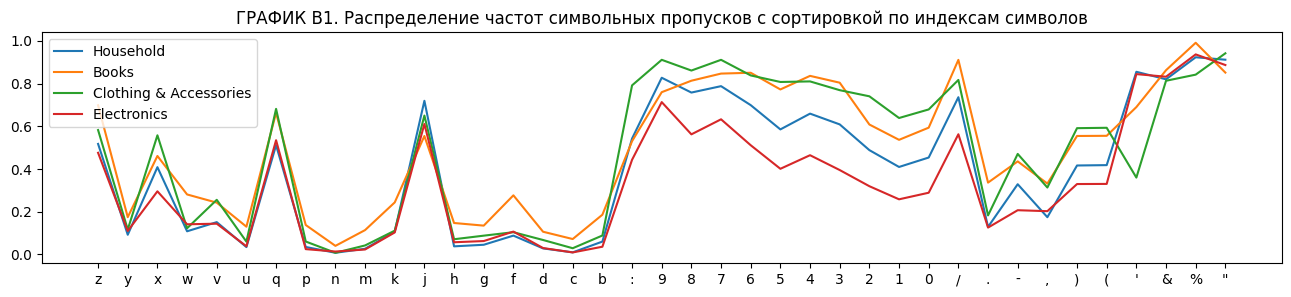

In [35]:
plt.figure(figsize=[16, 3])
for i in dfchar.Topic.unique():
  nansbytopic=nancounter(dfchar[dfchar.Topic==i].iloc[:, 2:], "1")
  sns.lineplot(nansbytopic/(dfchar[dfchar.Topic==i].shape[0]), label=i).set(title='ГРАФИК B1. Распределение частот символьных пропусков с сортировкой по индексам символов')
  # sns.lineplot(nancounter(i).iloc[:-3], label=i)

plt.show()

Теперь осуществим преобразование (лемматизацию) и заменим исходный текст лемматизатом

In [36]:
"""ГОТОВЫЙ ФАЙЛ ЗАГРУЖАЕТСЯ НИЖЕ"""
# # # Lemmatization
# spacy_lemmatizer = spacy.load("en_core_web_sm")

# def text_lemmatizer(text):
#     text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
#     return text_spacy
# z=dfchar.Desc_wows.apply(text_lemmatizer)
# z.to_hdf('data.h5', key='df')
# z.to_hdf('/content/drive/MyDrive/data.h5', key='df')


'ГОТОВЫЙ ФАЙЛ НИЖЕ'

In [107]:
pd.read_hdf('/content/drive/MyDrive/data.h5', key='df').head()

0    paper plane design frame wall hang motivationa...
1    saf ' floral ' frame painting ( wood , 30 inch...
2    saf ' uv texture modern art print frame ' pain...
3    saf flower print frame paint ( synthetic , 13....
4    incredible gift india wooden happy birthday un...
Name: Desc_wows, dtype: object

In [109]:
# dfchar.Desc_wows=pd.read_hdf('/content/drive/MyDrive/data.h5')

In [108]:
dfchar['Desc_wows']=pd.read_hdf('/content/drive/MyDrive/data.h5', key='df')
dfchar.head()

,Topic,Desc_wows,%,"""",',9,&,7,8,/,...,b,g,h,p,u,d,m,c,n,Topic_label
0,Household,paper plane design frame wall hang motivationa...,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,6.0,29.0,27.0,35.0,29.0,25.0,14.0,30.0,67.0,0
1,Household,"saf ' floral ' frame painting ( wood , 30 inch...",0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,...,1.0,6.0,4.0,9.0,8.0,6.0,5.0,11.0,12.0,0
2,Household,saf ' uv texture modern art print frame ' pain...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,6.0,25.0,10.0,22.0,24.0,27.0,28.0,31.0,51.0,0
3,Household,"saf flower print frame paint ( synthetic , 13....",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,22.0,9.0,15.0,21.0,22.0,18.0,20.0,45.0,0
4,Household,incredible gift india wooden happy birthday un...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.0,16.0,9.0,23.0,22.0,30.0,13.0,10.0,32.0,0


# Разбиение наборов данных и преобразование признаков

Поскольку у нас уже появились данные, мы можем посмотреть, будут ли они для полезны для предсказания целевой функции класса (классы преобразуются методом порядкового кодирования). Поэтому уже сейчас мы осуществим разбиение набора данных на 3 датасета: обучающий, проверочный и тестовый в соостношениях 0.7/0.15/0.15.

In [110]:
dfchar['Topic_label']=dfchar.Topic.map(dict(zip(dfchar.Topic.unique(), range(4))))

In [112]:
pd.DataFrame(dict(zip(dfchar.Topic.unique(), range(4))), index=["Topics"]).T #Легенды классов для наглядности

,Topics
Household,0
Books,1
Clothing & Accessories,2
Electronics,3


Поскольку большинство методов чувствительно к пропскам в данных, мы заменяем пропуски нулевыми значениями, поскольку пропуски в нашем случае это именно нулевые количества символов в документах, а не отсутствие данных о значениях.

In [113]:
dfchar.fillna(0, inplace=True)

In [114]:
X, y = dfchar.drop(['Topic', 'Topic_label'], axis=1)	, dfchar.Topic_label
X_train, X_check, y_train, y_check=train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_val, X_test, y_val, y_test=train_test_split(X_check, y_check,  train_size=0.5, random_state=42, stratify=y_check)

In [116]:
[i.shape[0] for i in [X, X_train, X_val, X_test]] # Проверка размера датасетов

[27802, 19461, 4170, 4171]

# Построение базовой модели на символьных признаках

Построим базовую модель с использованием символьных признаков.

Оценим производительности различных моделей с настройками гиперпараметров по умолчанию


In [117]:
# списки моделей и их имён для вывода
names = [
    "Logistic Regression",
    "Decision Tree",
    "Linear SVC",
    "Gaussian NB",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "Gradient Boosting Classifier",
    # "Light GBM Classifier",
    "Passive Aggressive Classifier",
    "Perceptron",
    "Bagging Classifier",
    "Extra Trees Classifier",
    "Multinomial NB",
]

models = [
    LogisticRegression(max_iter = 100),
    DecisionTreeClassifier(),
    LinearSVC(),
    GaussianNB(),
    RandomForestClassifier(),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    # LGBMClassifier(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    MultinomialNB(),
]

In [118]:
# модуль оценки точности предсказания модели
def mypredictor(mymodel, Xtr, ytr, Xval, yval):
  model=mymodel
  reals=[ytr, yval]
  model.fit(Xtr, ytr)
  preds=model.predict(Xtr), model.predict(Xval)
  preds_acc=[round(accuracy_score(preds[i], reals[i]), 3) for i in range(2)]
  return preds_acc


In [45]:
scoredict={}

# модуль перебора моделей и фиксации результатов оценки качества модели
for modname, model in enumerate(models):
  try:
    print(names[modname])
    scoredict[names[modname]]=mypredictor(model, X_train.iloc[:, 1:],
                      y_train,
                      X_val.iloc[:, 1:], y_val)
  except Exception:
    print('***************************')
    continue


Logistic Regression
Decision Tree
Linear SVC
Gaussian NB
Random Forest
SGD Classifier
Ridge Classifier
XGBoost
Gradient Boosting Classifier
Passive Aggressive Classifier
Perceptron
Bagging Classifier
Extra Trees Classifier
Multinomial NB


In [46]:

resdf=pd.DataFrame(scoredict, index=['train', 'val']).T.sort_values(by="val", ascending=False)

display(resdf)

,train,val
XGBoost,0.919,0.740
Extra Trees Classifier,1.000,0.724
Random Forest,1.000,0.712
Gradient Boosting Classifier,0.713,0.677
Bagging Classifier,0.987,0.677
Logistic Regression,0.612,0.606
Decision Tree,1.000,0.571
Ridge Classifier,0.528,0.524
Perceptron,0.522,0.522
SGD Classifier,0.522,0.521


Мы получили сравнительно неплохие (учитывая небольшое количество признаков) результаты при работе моделей XGB Случайный лес . Посмотрим, можем ли мы увеличить результативность метода применением автоматического подбора параметров. Для этого мы будем использовать  Optuna.

In [47]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 5, 25),
        'subsample': 0.9,
        'n_estimators': trial.suggest_int('n_estimators', 3000, 7000),
        'eta': trial.suggest_discrete_uniform('eta', 0.1, 1, 0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 3, 7),
        'reg_lambda': trial.suggest_int('reg_lambda', 80, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10, 1),
        # "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0)
    }

    model = XGBClassifier(**params)
    model.fit(X_train.iloc[:, 1:], y_train)
    predictions = model.predict(X_val.iloc[:, 1:])
    acc = accuracy_score(y_val, predictions)
    return acc

study = optuna.create_study(direction='maximize', study_name="Charmodel_XGB")
study.optimize(objective, n_trials=20)

[I 2023-10-18 03:36:36,986] A new study created in memory with name: Charmodel_XGB
[I 2023-10-18 03:38:15,828] Trial 0 finished with value: 0.7429256594724221 and parameters: {'max_depth': 12, 'n_estimators': 4762, 'eta': 0.9, 'reg_alpha': 5.127228199913085, 'reg_lambda': 87, 'min_child_weight': 8}. Best is trial 0 with value: 0.7429256594724221.
[I 2023-10-18 03:39:37,976] Trial 1 finished with value: 0.7517985611510791 and parameters: {'max_depth': 15, 'n_estimators': 5046, 'eta': 0.4, 'reg_alpha': 5.449977883723452, 'reg_lambda': 87, 'min_child_weight': 7}. Best is trial 1 with value: 0.7517985611510791.
[I 2023-10-18 03:42:20,707] Trial 2 finished with value: 0.7491606714628297 and parameters: {'max_depth': 17, 'n_estimators': 3592, 'eta': 0.1, 'reg_alpha': 5.04363076930944, 'reg_lambda': 426, 'min_child_weight': 8}. Best is trial 1 with value: 0.7517985611510791.
[I 2023-10-18 03:43:56,682] Trial 3 finished with value: 0.7453237410071942 and parameters: {'max_depth': 14, 'n_estima

In [99]:
print(f'Максимальное значение точноcти на валидационном наборе данных: {round(study.best_value, 3)}')

Максимальное значение точноcти на валидационном наборе данных: 0.753


На графиках ниже приведена информация о гиперпараметрах и степени их связи с целевой переменной задачи их оптимизации (в данном случае увеличения точности прогноза)

In [84]:
plot_parallel_coordinate(study)

In [85]:
plot_param_importances(study)

In [55]:
study.best_params

{'max_depth': 16,
 'n_estimators': 3997,
 'eta': 0.1,
 'reg_alpha': 3.4303070417126484,
 'reg_lambda': 137,
 'min_child_weight': 2}

In [56]:
XGBClassifier(study.best_params)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              objective={'eta': 0.1, 'max_depth': 16, 'min_child_weight': 2,
                         'n_estimators': 3997, 'reg_alpha': 3.4303070417126484,
                         'reg_lambda': 137}, ...)

Посмотрим какой точности предсказаний мы достигнем с помощью этой модели на тестовом образце, а также информацию по остальным метрикам

In [100]:
tstres=round(accuracy_score(XGBClassifier(study.best_params).fit(X_train.iloc[:, 1:],
                                                          y_train).predict(X_test.iloc[:, 1:]), y_test), 4)

In [102]:
print(f'Точноcть предсказания на тестовой выборке: {round(tstres, 3)}')

Точноcть предсказания на тестовой выборке: 0.741


In [82]:
pd.DataFrame(classification_report(XGBClassifier(
    study.best_params).fit(X_train.iloc[:, 1:],
                           y_train).predict(X_test.iloc[:, 1:]), y_test, output_dict=True)).T

,precision,recall,f1-score,support
0,0.790536,0.680608,0.731465,1841.00000
1,0.749734,0.812933,0.780055,866.00000
2,0.756757,0.821429,0.787768,784.00000
3,0.614322,0.719118,0.662602,680.00000
accuracy,0.740830,0.740830,0.740830,0.74083
macro avg,0.727837,0.758522,0.740472,4171.00000
weighted avg,0.746987,0.740830,0.740910,4171.00000


Полученные с помощью моделей значения точности недостаточно высоки для того чтобы ограничиться этими признаками. Мы лемматизируем преобразуем признак описания TF_IDF

In [50]:
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))

def Tfidf_transformer(Xtr, Xval, Xtst):
  vectorizer=TfidfVec
  Xtr_ifdf=vectorizer.fit_transform(Xtr['Desc_wows'])
  Xval_ifdf=vectorizer.transform(Xval['Desc_wows'])
  Xtst_ifdf=vectorizer.transform(Xtst['Desc_wows'])
  return Xtr_ifdf, Xval_ifdf, Xtst_ifdf

def csr_concater(vec, feat):
  return hstack((csr_matrix(feat.iloc[:, 1:]), vec))


Xtr_vec, Xval_vec, Xtst_vec = Tfidf_transformer(X_train,
                                                X_val,
                                                X_test)

X_trainf=csr_concater(Xtr_vec, X_train.iloc[:, 1:])
X_valf=csr_concater(Xval_vec, X_val.iloc[:, 1:])
X_testf=csr_concater(Xtst_vec, X_test.iloc[:, 1:])

Полученные датасеты сохранем в файл Deep Dish для работы с ним в других ноутбуках

In [ ]:
from collections import OrderedDict
DSets_dict=OrderedDict()

In [103]:
DSets_dict={'X_sets':{'X_train': X_trainf, 'X_val':X_valf, 'X_test':X_testf},
            'y_sets':{'y_train': y_train, 'y_val':y_val, 'y_test':y_test}}

In [104]:
dd.io.save('/content/drive/MyDrive/DSets_store', DSets_dict, compression=('blosc', 9))

In [105]:
dd.io.save('DSets_store', DSets_dict, compression=('blosc', 9))

На этом работа по подготовке данных завершена, построение модели на полном пространстве признаков в отдельном ноутбуке "DIPLOMA TF-IDF.ipynb"